In [ ]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/SMU_MITB_NLP/project/airbnb_labelled.csv')

In [ ]:
data.head()

,listing_id,id,date,reviewer_id,reviewer_name,Review,Category,Sentiment
0,11391287,2.081364e+08,31/10/17,68485599,Ali,Fantastic location and fantastic hosts for a v...,location,positive
1,50319142,5.744510e+17,3/3/22,81633638,Christophe,Super happy with this stylish and comfy apartm...,communicate,positive
2,272282,5.281465e+07,2/11/15,8528459,Rebecca,Mar made us feel very welcomed with great dire...,communicate,positive
3,4683548,4.758410e+17,18/10/21,190705793,Ron,Andres is an amazing host! <br/>Not only the a...,accurate,positive
4,7838608,1.923088e+08,10/9/17,12034187,Giuseppe,A lovely room which was spacious and clean. Al...,cleanliness,positive


In [ ]:
supervised_cat_true = pd.read_csv('/content/drive/MyDrive/SMU_MITB_NLP/project/supervised/category_actual.txt', sep="\n", header=None)
supervised_sent_true = pd.read_csv('/content/drive/MyDrive/SMU_MITB_NLP/project/supervised/sentiment_actual.txt', sep="\n", header=None)

In [ ]:
supervised_bert_cat_y = pd.read_csv('/content/drive/MyDrive/SMU_MITB_NLP/project/supervised/bert_classifier_y_pred_category.txt', sep="\n", header=None)
supervised_bert_sent_y = pd.read_csv('/content/drive/MyDrive/SMU_MITB_NLP/project/supervised/bert_classifier_y_pred_sentiment.txt', sep="\n", header=None)
unsupervised_bert_cat_y = pd.read_csv('/content/drive/MyDrive/SMU_MITB_NLP/project/unsupervised/unsupervised_bert_cat_preds.txt', sep="\n", header=None)
unsupervised_bert_sent_y = pd.read_csv('/content/drive/MyDrive/SMU_MITB_NLP/project/unsupervised/unsupervised_bert_sent_preds.txt', sep="\n", header=None)

In [ ]:
bert_classifier_review = pd.read_csv('/content/drive/MyDrive/SMU_MITB_NLP/project/supervised_bert_data.csv')

In [ ]:
word2vec_cat_y = pd.read_csv('/content/drive/MyDrive/SMU_MITB_NLP/project/w2v_affin_y_pred_category.txt', sep="\n", header=None)
word2vec_sent_y = pd.read_csv('/content/drive/MyDrive/SMU_MITB_NLP/project/w2v_affin_y_pred_sentiment.txt', sep="\n", header=None)

In [ ]:
word2vec = pd.read_csv('/content/drive/MyDrive/SMU_MITB_NLP/project/review_aspect_cat300.csv')

In [ ]:
word2vec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  300 non-null    int64  
 1   date                300 non-null    object 
 2   reviewer_id         300 non-null    int64  
 3   reviewer_name       300 non-null    object 
 4   Review              300 non-null    object 
 5   review_id           191 non-null    float64
 6   sentence_id         191 non-null    float64
 7   noun                191 non-null    object 
 8   adj                 191 non-null    object 
 9   sentiment           191 non-null    object 
 10  aspect              191 non-null    object 
 11  closeness           191 non-null    float64
 12  sentiment_rescaled  191 non-null    float64
 13  sentence            191 non-null    object 
 14  afinn_score2        191 non-null    float64
dtypes: float64(5), int64(2), object(8)
memory usage: 35.3+ KB

In [ ]:
x = word2vec.dropna()

In [ ]:
word2vec['aspect'].value_counts()

location       115
value           40
communicate     30
cleanliness      4
accuracy         2
Name: aspect, dtype: int64

In [ ]:
word2vec['sentiment'] = word2vec['sentiment'].fillna('positive')
word2vec['aspect'] = word2vec['aspect'].fillna('location')

In [ ]:
from sklearn import metrics

In [ ]:
pd.options.display.max_columns = None
pd.set_option('display.max_colwidth', None)

In [ ]:
# word2vec category

In [ ]:
word2vec_result = pd.concat([word2vec['Review'], data['Category'], word2vec['aspect']], axis=1)
word2vec_result.columns=['review', 'y_actual', 'y_pred']
word2vec_result.head()

,review,y_actual,y_pred
0,"Fantastic location and fantastic hosts for a very reasonable price, would definitely use again!",location,value
1,"Super happy with this stylish and comfy apartment for our family of 5. Easy check-in, hospitable service, great amenities and situated in a beautiful building. Loved our stay and we'll be back!",communicate,NaN
2,"Mar made us feel very welcomed with great directions, guestbook and assistance before our arrival. We loved the residential feel to the building and the neighbourhood, with a train located just around the corner but we walked every where and great to get away from the crowds. \n<br/>\n<br/>The two bathrooms, situated side by side (not en-suite to any of the bedrooms) were large and well equipped. This setup is most suited for families. Showers had a lovely pressure.\n<br/>\n<br/>The decor is lovely and the large dining table is excellent for gatherings with goodies from the market. Plenty of space to lounge about too.",communicate,cleanliness
3,"Andres is an amazing host! <br/>Not only the apartment is what you see in the pictures, it‚Äôs so much more. From checking in to checking out Andres <br/>was incredible<br/>The apartment was very clean an tidy and the terrace was absolutely stunning<br/>We really felt at home!<br/>Definitely would come back again!",accurate,NaN
4,A lovely room which was spacious and clean. Also great support from our host with good tips and insights. The location is excellent. Would highly recommend.,cleanliness,accuracy


In [ ]:
word2vec.dropna(inplace=True)

In [ ]:
word2vec_result['error'] = np.where(word2vec_result['y_pred']!=word2vec_result['y_actual'], 1, 0)
word2vec_result.head()

,review,y_actual,y_pred,error
0,"Fantastic location and fantastic hosts for a very reasonable price, would definitely use again!",location,value,1
1,"Super happy with this stylish and comfy apartment for our family of 5. Easy check-in, hospitable service, great amenities and situated in a beautiful building. Loved our stay and we'll be back!",communicate,location,1
2,"Mar made us feel very welcomed with great directions, guestbook and assistance before our arrival. We loved the residential feel to the building and the neighbourhood, with a train located just around the corner but we walked every where and great to get away from the crowds. \n<br/>\n<br/>The two bathrooms, situated side by side (not en-suite to any of the bedrooms) were large and well equipped. This setup is most suited for families. Showers had a lovely pressure.\n<br/>\n<br/>The decor is lovely and the large dining table is excellent for gatherings with goodies from the market. Plenty of space to lounge about too.",communicate,cleanliness,1
3,"Andres is an amazing host! <br/>Not only the apartment is what you see in the pictures, it‚Äôs so much more. From checking in to checking out Andres <br/>was incredible<br/>The apartment was very clean an tidy and the terrace was absolutely stunning<br/>We really felt at home!<br/>Definitely would come back again!",accurate,location,1
4,A lovely room which was spacious and clean. Also great support from our host with good tips and insights. The location is excellent. Would highly recommend.,cleanliness,accuracy,1


In [ ]:
word2vec_result.dropna(inplace=True)

In [ ]:
metrics.f1_score(word2vec_result['y_actual'], word2vec_result['y_pred'], average='macro')

0.15229145175519865

In [ ]:
metrics.accuracy_score(word2vec_result['y_actual'], word2vec_result['y_pred'])

0.33507853403141363

In [ ]:
word2vec_result[word2vec_result['error']==1].to_csv('/content/drive/MyDrive/SMU_MITB_NLP/project/word2vec_error_cat.csv')

In [ ]:
word2vec_result[word2vec_result['y_pred']=='cleanliness']

,review,y_actual,y_pred
2,"Mar made us feel very welcomed with great directions, guestbook and assistance before our arrival. We loved the residential feel to the building and the neighbourhood, with a train located just around the corner but we walked every where and great to get away from the crowds. \n<br/>\n<br/>The two bathrooms, situated side by side (not en-suite to any of the bedrooms) were large and well equipped. This setup is most suited for families. Showers had a lovely pressure.\n<br/>\n<br/>The decor is lovely and the large dining table is excellent for gatherings with goodies from the market. Plenty of space to lounge about too.",communicate,cleanliness
210,"Great location, we walked everywhere! 30-40 mins to park guell, 30-40 mins to plaza catalunya, 15 mins to Sagrada familia ...and really close to some lovely buzzing bars and restaurants in Gr√°cia. <br/><br/>The house is well equipped and very clean. Just wish it had been warmer to make the most of the terrace! Such a luxury in central Barcelona.",location,cleanliness
283,Great host. Ivan is great. Provided genuine hospitality. Made us feel at home and gave us good recommendations.,communicate,cleanliness
296,"We had a wonderful time in Barcelona! <br/>The apartment was pretty good for us. The terrace was the highlight of the apartment! We spent a lot of time having wine and relaxing out there. <br/>The location was good. We had to walk everywhere or take a cab to get to the places we visited. <br/>As for the apartment itself , it could have been much cleaner. There were stains on the couch as well as the sheets not being very clean. There was a lack of cleanliness in the apartment. Lack of towels , sheets and other amenities. <br/>Also there‚Äôs a very small elevator that is the only use of getting to the top floor, it was broken one day so we had to walk up 10 flights of stairs which was pretty rough! <br/>Overall is was good for us. <br/><br/>Thank you <br/>",value,cleanliness


Text(0.5, 1.0, 'Word2Vec Confusion Matrix - Category')

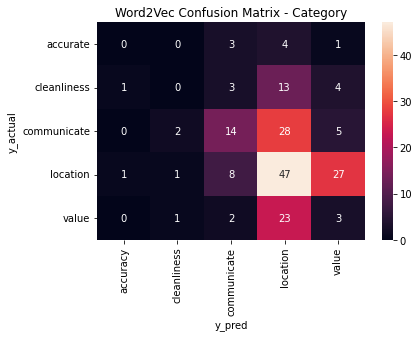

In [ ]:
confusion_matrix_word2vec = pd.crosstab(word2vec_result['y_actual'], word2vec_result['y_pred'], rownames=['y_actual'], colnames=['y_pred'], margins = True)
confusion_matrix_word2vec.drop('All', inplace=True, axis=1)
confusion_matrix_word2vec.drop('All', inplace=True)
sns.heatmap(confusion_matrix_word2vec, annot=True)
plt.title('Word2Vec Confusion Matrix - Category')

In [ ]:
word2vec_result_sent = pd.concat([word2vec['Review'], data['Sentiment'], word2vec['sentiment']], axis=1)
word2vec_result_sent.columns=['review', 'y_actual', 'y_pred']
word2vec_result_sent.head()

,review,y_actual,y_pred
0,"Fantastic location and fantastic hosts for a very reasonable price, would definitely use again!",positive,positive
1,NaN,positive,NaN
2,"Mar made us feel very welcomed with great directions, guestbook and assistance before our arrival. We loved the residential feel to the building and the neighbourhood, with a train located just around the corner but we walked every where and great to get away from the crowds. \n<br/>\n<br/>The two bathrooms, situated side by side (not en-suite to any of the bedrooms) were large and well equipped. This setup is most suited for families. Showers had a lovely pressure.\n<br/>\n<br/>The decor is lovely and the large dining table is excellent for gatherings with goodies from the market. Plenty of space to lounge about too.",positive,neutral
3,NaN,positive,NaN
4,A lovely room which was spacious and clean. Also great support from our host with good tips and insights. The location is excellent. Would highly recommend.,positive,positive


In [ ]:
word2vec_result_sent['error'] = np.where(word2vec_result_sent['y_pred']!=word2vec_result_sent['y_actual'], 1, 0)
word2vec_result_sent.head()

,review,y_actual,y_pred,error
0,"Fantastic location and fantastic hosts for a very reasonable price, would definitely use again!",positive,positive,0
1,"Super happy with this stylish and comfy apartment for our family of 5. Easy check-in, hospitable service, great amenities and situated in a beautiful building. Loved our stay and we'll be back!",positive,positive,0
2,"Mar made us feel very welcomed with great directions, guestbook and assistance before our arrival. We loved the residential feel to the building and the neighbourhood, with a train located just around the corner but we walked every where and great to get away from the crowds. \n<br/>\n<br/>The two bathrooms, situated side by side (not en-suite to any of the bedrooms) were large and well equipped. This setup is most suited for families. Showers had a lovely pressure.\n<br/>\n<br/>The decor is lovely and the large dining table is excellent for gatherings with goodies from the market. Plenty of space to lounge about too.",positive,neutral,1
3,"Andres is an amazing host! <br/>Not only the apartment is what you see in the pictures, it‚Äôs so much more. From checking in to checking out Andres <br/>was incredible<br/>The apartment was very clean an tidy and the terrace was absolutely stunning<br/>We really felt at home!<br/>Definitely would come back again!",positive,positive,0
4,A lovely room which was spacious and clean. Also great support from our host with good tips and insights. The location is excellent. Would highly recommend.,positive,positive,0


In [ ]:
word2vec_result_sent['error'] = np.where(word2vec_result_sent['y_pred']!=word2vec_result_sent['y_actual'], 1, 0)
word2vec_result_sent[word2vec_result_sent['error']==1].to_csv('/content/drive/MyDrive/SMU_MITB_NLP/project/word2vec_error_sent.csv')

In [ ]:
word2vec_result_sent.dropna(inplace=True)

In [ ]:
metrics.accuracy_score(word2vec_result_sent['y_actual'], word2vec_result_sent['y_pred'])

0.680628272251309

In [ ]:
metrics.f1_score(word2vec_result_sent['y_actual'], word2vec_result_sent['y_pred'], average='macro')

0.2725366876310273

Text(0.5, 1.0, 'Word2Vec Confusion Matrix - Sentiment')

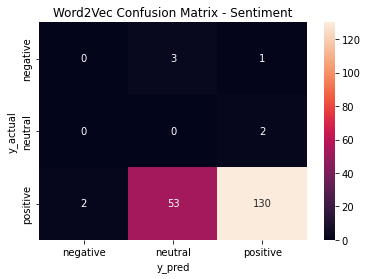

In [ ]:
confusion_matrix_word2vec_sent = pd.crosstab(word2vec_result_sent['y_actual'], word2vec_result_sent['y_pred'], rownames=['y_actual'], colnames=['y_pred'], margins = True)
confusion_matrix_word2vec_sent.drop('All', inplace=True, axis=1)
confusion_matrix_word2vec_sent.drop('All', inplace=True)
sns.heatmap(confusion_matrix_word2vec_sent, annot=True, fmt='g')
plt.title('Word2Vec Confusion Matrix - Sentiment')

In [ ]:
# unsupervised category
metrics.accuracy_score(data['Category'], unsupervised_bert_cat_y)

0.2633333333333333

In [ ]:
metrics.f1_score(data['Category'], unsupervised_bert_cat_y, average='macro')

0.19597447226313208

In [ ]:
unsupervised_result = pd.concat([data['Review'], data['Category'], unsupervised_bert_cat_y], axis=1)
unsupervised_result.columns=['review', 'y_actual', 'y_pred']
unsupervised_result.head()

,review,y_actual,y_pred
0,"Fantastic location and fantastic hosts for a very reasonable price, would definitely use again!",location,cleanliness
1,"Super happy with this stylish and comfy apartment for our family of 5. Easy check-in, hospitable service, great amenities and situated in a beautiful building. Loved our stay and we'll be back!",communicate,value
2,"Mar made us feel very welcomed with great directions, guestbook and assistance before our arrival. We loved the residential feel to the building and the neighbourhood, with a train located just around the corner but we walked every where and great to get away from the crowds. \n<br/>\n<br/>The two bathrooms, situated side by side (not en-suite to any of the bedrooms) were large and well equipped. This setup is most suited for families. Showers had a lovely pressure.\n<br/>\n<br/>The decor is lovely and the large dining table is excellent for gatherings with goodies from the market. Plenty of space to lounge about too.",communicate,cleanliness
3,"Andres is an amazing host! <br/>Not only the apartment is what you see in the pictures, it‚Äôs so much more. From checking in to checking out Andres <br/>was incredible<br/>The apartment was very clean an tidy and the terrace was absolutely stunning<br/>We really felt at home!<br/>Definitely would come back again!",accurate,communicate
4,A lovely room which was spacious and clean. Also great support from our host with good tips and insights. The location is excellent. Would highly recommend.,cleanliness,location


In [ ]:
unsupervised_result['error'] = np.where(unsupervised_result['y_pred']!=unsupervised_result['y_actual'], 1, 0)
unsupervised_result.head()

,review,y_actual,y_pred,error
0,"Fantastic location and fantastic hosts for a very reasonable price, would definitely use again!",location,cleanliness,1
1,"Super happy with this stylish and comfy apartment for our family of 5. Easy check-in, hospitable service, great amenities and situated in a beautiful building. Loved our stay and we'll be back!",communicate,value,1
2,"Mar made us feel very welcomed with great directions, guestbook and assistance before our arrival. We loved the residential feel to the building and the neighbourhood, with a train located just around the corner but we walked every where and great to get away from the crowds. \n<br/>\n<br/>The two bathrooms, situated side by side (not en-suite to any of the bedrooms) were large and well equipped. This setup is most suited for families. Showers had a lovely pressure.\n<br/>\n<br/>The decor is lovely and the large dining table is excellent for gatherings with goodies from the market. Plenty of space to lounge about too.",communicate,cleanliness,1
3,"Andres is an amazing host! <br/>Not only the apartment is what you see in the pictures, it‚Äôs so much more. From checking in to checking out Andres <br/>was incredible<br/>The apartment was very clean an tidy and the terrace was absolutely stunning<br/>We really felt at home!<br/>Definitely would come back again!",accurate,communicate,1
4,A lovely room which was spacious and clean. Also great support from our host with good tips and insights. The location is excellent. Would highly recommend.,cleanliness,location,1


In [ ]:
# unsupervised wrong prediction
unsupervised_result.groupby('y_pred')['error'].sum()

y_pred
cleanliness    82
communicate    75
location       32
value          32
Name: error, dtype: int64

In [ ]:
unsupervised_result[unsupervised_result['error']==1].to_csv('/content/drive/MyDrive/SMU_MITB_NLP/project/unsupervised_bert_error_cat.csv')

Text(0.5, 1.0, 'Unsupervised BERT Confusion Matrix - Category')

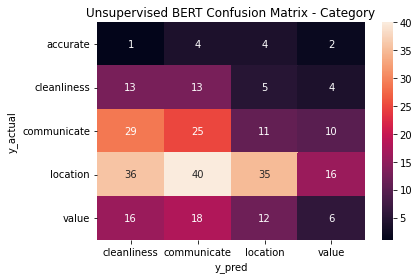

In [ ]:
confusion_matrix_unsupervised = pd.crosstab(unsupervised_result['y_actual'], unsupervised_result['y_pred'], rownames=['y_actual'], colnames=['y_pred'], margins = True)
confusion_matrix_unsupervised.drop('All', inplace=True, axis=1)
confusion_matrix_unsupervised.drop('All', inplace=True)
sns.heatmap(confusion_matrix_unsupervised, annot=True)
plt.title('Unsupervised BERT Confusion Matrix - Category')

In [ ]:
supervised_result.head()

,review,y_actual,y_pred
0,"The apartment is very well located, it's near the metro station and there are small shops downstairs. Najla is really friendly and responds to the message quickly. The apartment is highly recommended.",location,location
1,"Great apartment tucked away in a great area of town that is within walking distance of most of the sites around Barcelona. Lot of nice restaurants in the neighborhood and is it pretty silent and comfortable in spite of being in a busy neighborhood. Walkable to public transport as well. Be aware that this Airbnb is on the 5th floor and you need to climb around 90 steps to get there. If you pack light, it should not be a problem at all. We did have to struggle a bit the first day during check in but rest of the time it was an easy climb. Everything else was fine and would stay here again if i come to Barcelona",cleanliness,location
2,"Nice and modern, stylish and cosy appartment in a cenctral area with small cafes and supermarkets. As it lies on a busy street, it is quite noisy, but we felt very comfortable there with two adults and two kids.",value,location
3,"The location was great and the onsite property manager was extremely helpful! Check-in was so easy with the office being onsite. We were easily able to store our luggage until the unit was ready. During our stay there was something critical we need to print and the office helped us out immediately. Also, the electronic key was not working one time when we returned and it was so quick and easy to go down to the office and get it re-activated. With other places that have offsite offices, this would have been annoying to fix, but was super easy at ApartRamblas108!! LOVED the location!!!! It was almost right across the street from La Boqueria and in walking distance to the Gothic Quarter, Aquarium, Pl Catalunya, El Nacional, etc). We would definitely recommend this unit!",location,location
4,Marija is A very good host. Very friendly. Fast and good communication. Appartement nice and clean. Good to reach near metro Lesseps. Thanks for the nice stay!,communicate,value


In [ ]:
# unsupervised sentiment
metrics.accuracy_score(data['Sentiment'], unsupervised_bert_sent_y)

0.9033333333333333

In [ ]:
metrics.f1_score(data['Sentiment'], unsupervised_bert_sent_y, average='macro')

0.3639635115909281

In [ ]:
unsupervised_result_sent = pd.concat([data['Review'], data['Sentiment'], unsupervised_bert_sent_y], axis=1)
unsupervised_result_sent.columns=['review', 'y_actual', 'y_pred']
unsupervised_result_sent.head()

,review,y_actual,y_pred
0,"Fantastic location and fantastic hosts for a very reasonable price, would definitely use again!",positive,positive
1,"Super happy with this stylish and comfy apartment for our family of 5. Easy check-in, hospitable service, great amenities and situated in a beautiful building. Loved our stay and we'll be back!",positive,neutral
2,"Mar made us feel very welcomed with great directions, guestbook and assistance before our arrival. We loved the residential feel to the building and the neighbourhood, with a train located just around the corner but we walked every where and great to get away from the crowds. \n<br/>\n<br/>The two bathrooms, situated side by side (not en-suite to any of the bedrooms) were large and well equipped. This setup is most suited for families. Showers had a lovely pressure.\n<br/>\n<br/>The decor is lovely and the large dining table is excellent for gatherings with goodies from the market. Plenty of space to lounge about too.",positive,neutral
3,"Andres is an amazing host! <br/>Not only the apartment is what you see in the pictures, it‚Äôs so much more. From checking in to checking out Andres <br/>was incredible<br/>The apartment was very clean an tidy and the terrace was absolutely stunning<br/>We really felt at home!<br/>Definitely would come back again!",positive,positive
4,A lovely room which was spacious and clean. Also great support from our host with good tips and insights. The location is excellent. Would highly recommend.,positive,positive


Text(0.5, 1.0, 'Unsupervised BERT Confusion Matrix - Sentiment')

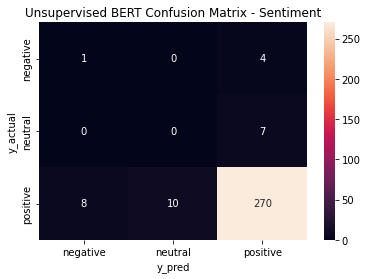

In [ ]:
confusion_matrix_unsupervised_sent = pd.crosstab(unsupervised_result_sent['y_actual'], unsupervised_result_sent['y_pred'], rownames=['y_actual'], colnames=['y_pred'], margins = True)
confusion_matrix_unsupervised_sent.drop('All', inplace=True, axis=1)
confusion_matrix_unsupervised_sent.drop('All', inplace=True)
sns.heatmap(confusion_matrix_unsupervised_sent, annot=True, fmt='g')
plt.title('Unsupervised BERT Confusion Matrix - Sentiment')

In [ ]:
unsupervised_result_sent['error'] = np.where(unsupervised_result_sent['y_pred']!=unsupervised_result_sent['y_actual'], 1, 0)
unsupervised_result_sent.head()

,review,y_actual,y_pred,error
0,"Fantastic location and fantastic hosts for a very reasonable price, would definitely use again!",positive,positive,0
1,"Super happy with this stylish and comfy apartment for our family of 5. Easy check-in, hospitable service, great amenities and situated in a beautiful building. Loved our stay and we'll be back!",positive,neutral,1
2,"Mar made us feel very welcomed with great directions, guestbook and assistance before our arrival. We loved the residential feel to the building and the neighbourhood, with a train located just around the corner but we walked every where and great to get away from the crowds. \n<br/>\n<br/>The two bathrooms, situated side by side (not en-suite to any of the bedrooms) were large and well equipped. This setup is most suited for families. Showers had a lovely pressure.\n<br/>\n<br/>The decor is lovely and the large dining table is excellent for gatherings with goodies from the market. Plenty of space to lounge about too.",positive,neutral,1
3,"Andres is an amazing host! <br/>Not only the apartment is what you see in the pictures, it‚Äôs so much more. From checking in to checking out Andres <br/>was incredible<br/>The apartment was very clean an tidy and the terrace was absolutely stunning<br/>We really felt at home!<br/>Definitely would come back again!",positive,positive,0
4,A lovely room which was spacious and clean. Also great support from our host with good tips and insights. The location is excellent. Would highly recommend.,positive,positive,0


In [ ]:
unsupervised_result_sent[unsupervised_result_sent['error']==1].to_csv('/content/drive/MyDrive/SMU_MITB_NLP/project/unsupervised_bert_error_sent.csv')

In [ ]:
# supervised category
metrics.accuracy_score(supervised_cat_true, supervised_bert_cat_y)

0.38333333333333336

In [ ]:
metrics.f1_score(supervised_cat_true, supervised_bert_cat_y, average='macro')

0.1526315789473684

In [ ]:
supervised_result = pd.concat([bert_classifier_review['Review'], supervised_cat_true, supervised_bert_cat_y], axis=1)
supervised_result.columns = ['review', 'y_actual', 'y_pred']
supervised_result.head()

,review,y_actual,y_pred
0,"The apartment is very well located, it's near the metro station and there are small shops downstairs. Najla is really friendly and responds to the message quickly. The apartment is highly recommended.",location,location
1,"Great apartment tucked away in a great area of town that is within walking distance of most of the sites around Barcelona. Lot of nice restaurants in the neighborhood and is it pretty silent and comfortable in spite of being in a busy neighborhood. Walkable to public transport as well. Be aware that this Airbnb is on the 5th floor and you need to climb around 90 steps to get there. If you pack light, it should not be a problem at all. We did have to struggle a bit the first day during check in but rest of the time it was an easy climb. Everything else was fine and would stay here again if i come to Barcelona",cleanliness,location
2,"Nice and modern, stylish and cosy appartment in a cenctral area with small cafes and supermarkets. As it lies on a busy street, it is quite noisy, but we felt very comfortable there with two adults and two kids.",value,location
3,"The location was great and the onsite property manager was extremely helpful! Check-in was so easy with the office being onsite. We were easily able to store our luggage until the unit was ready. During our stay there was something critical we need to print and the office helped us out immediately. Also, the electronic key was not working one time when we returned and it was so quick and easy to go down to the office and get it re-activated. With other places that have offsite offices, this would have been annoying to fix, but was super easy at ApartRamblas108!! LOVED the location!!!! It was almost right across the street from La Boqueria and in walking distance to the Gothic Quarter, Aquarium, Pl Catalunya, El Nacional, etc). We would definitely recommend this unit!",location,location
4,Marija is A very good host. Very friendly. Fast and good communication. Appartement nice and clean. Good to reach near metro Lesseps. Thanks for the nice stay!,communicate,value


In [ ]:
supervised_result['error'] = np.where(supervised_result['y_pred']!=supervised_result['y_actual'], 1, 0)
supervised_result.head()

,review,y_actual,y_pred,error
0,"The apartment is very well located, it's near the metro station and there are small shops downstairs. Najla is really friendly and responds to the message quickly. The apartment is highly recommended.",location,location,0
1,"Great apartment tucked away in a great area of town that is within walking distance of most of the sites around Barcelona. Lot of nice restaurants in the neighborhood and is it pretty silent and comfortable in spite of being in a busy neighborhood. Walkable to public transport as well. Be aware that this Airbnb is on the 5th floor and you need to climb around 90 steps to get there. If you pack light, it should not be a problem at all. We did have to struggle a bit the first day during check in but rest of the time it was an easy climb. Everything else was fine and would stay here again if i come to Barcelona",cleanliness,location,1
2,"Nice and modern, stylish and cosy appartment in a cenctral area with small cafes and supermarkets. As it lies on a busy street, it is quite noisy, but we felt very comfortable there with two adults and two kids.",value,location,1
3,"The location was great and the onsite property manager was extremely helpful! Check-in was so easy with the office being onsite. We were easily able to store our luggage until the unit was ready. During our stay there was something critical we need to print and the office helped us out immediately. Also, the electronic key was not working one time when we returned and it was so quick and easy to go down to the office and get it re-activated. With other places that have offsite offices, this would have been annoying to fix, but was super easy at ApartRamblas108!! LOVED the location!!!! It was almost right across the street from La Boqueria and in walking distance to the Gothic Quarter, Aquarium, Pl Catalunya, El Nacional, etc). We would definitely recommend this unit!",location,location,0
4,Marija is A very good host. Very friendly. Fast and good communication. Appartement nice and clean. Good to reach near metro Lesseps. Thanks for the nice stay!,communicate,value,1


In [ ]:
supervised_result[supervised_result['error']==1].to_csv('/content/drive/MyDrive/SMU_MITB_NLP/project/supervised_bert_error_cat.csv')

Text(0.5, 1.0, 'Supervised BERT Confusion Matrix - Category')

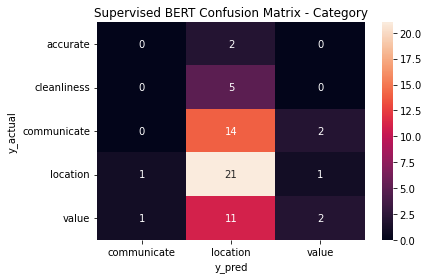

In [ ]:
confusion_matrix_supervised = pd.crosstab(supervised_result['y_actual'], supervised_result['y_pred'], rownames=['y_actual'], colnames=['y_pred'], margins = True)
confusion_matrix_supervised.drop('All', inplace=True, axis=1)
confusion_matrix_supervised.drop('All', inplace=True)
sns.heatmap(confusion_matrix_supervised, annot=True)
plt.title('Supervised BERT Confusion Matrix - Category')

In [ ]:
# supervised sentiment
metrics.accuracy_score(supervised_sent_true, supervised_bert_sent_y)

0.9666666666666667

In [ ]:
metrics.f1_score(supervised_sent_true, supervised_bert_sent_y, average='macro')

0.327683615819209

In [ ]:
supervised_result_sent = pd.concat([bert_classifier_review['Review'], supervised_sent_true, supervised_bert_sent_y], axis=1)
supervised_result_sent.columns = ['review', 'y_actual', 'y_pred']
supervised_result_sent.head()

,review,y_actual,y_pred
0,"The apartment is very well located, it's near the metro station and there are small shops downstairs. Najla is really friendly and responds to the message quickly. The apartment is highly recommended.",positive,positive
1,"Great apartment tucked away in a great area of town that is within walking distance of most of the sites around Barcelona. Lot of nice restaurants in the neighborhood and is it pretty silent and comfortable in spite of being in a busy neighborhood. Walkable to public transport as well. Be aware that this Airbnb is on the 5th floor and you need to climb around 90 steps to get there. If you pack light, it should not be a problem at all. We did have to struggle a bit the first day during check in but rest of the time it was an easy climb. Everything else was fine and would stay here again if i come to Barcelona",positive,positive
2,"Nice and modern, stylish and cosy appartment in a cenctral area with small cafes and supermarkets. As it lies on a busy street, it is quite noisy, but we felt very comfortable there with two adults and two kids.",positive,positive
3,"The location was great and the onsite property manager was extremely helpful! Check-in was so easy with the office being onsite. We were easily able to store our luggage until the unit was ready. During our stay there was something critical we need to print and the office helped us out immediately. Also, the electronic key was not working one time when we returned and it was so quick and easy to go down to the office and get it re-activated. With other places that have offsite offices, this would have been annoying to fix, but was super easy at ApartRamblas108!! LOVED the location!!!! It was almost right across the street from La Boqueria and in walking distance to the Gothic Quarter, Aquarium, Pl Catalunya, El Nacional, etc). We would definitely recommend this unit!",positive,positive
4,Marija is A very good host. Very friendly. Fast and good communication. Appartement nice and clean. Good to reach near metro Lesseps. Thanks for the nice stay!,positive,positive


Text(0.5, 1.0, 'Supervised BERT Confusion Matrix - Sentiment')

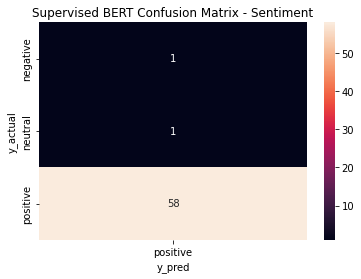

In [ ]:
confusion_matrix_supervised_sent = pd.crosstab(supervised_result_sent['y_actual'], supervised_result_sent['y_pred'], rownames=['y_actual'], colnames=['y_pred'], margins = True)
confusion_matrix_supervised_sent.drop('All', inplace=True, axis=1)
confusion_matrix_supervised_sent.drop('All', inplace=True)
sns.heatmap(confusion_matrix_supervised_sent, annot=True)
plt.title('Supervised BERT Confusion Matrix - Sentiment')

In [ ]:
supervised_result_sent['error'] = np.where(supervised_result_sent['y_pred']!=supervised_result_sent['y_actual'], 1, 0)
supervised_result_sent.head()

,review,y_actual,y_pred,error
0,"The apartment is very well located, it's near the metro station and there are small shops downstairs. Najla is really friendly and responds to the message quickly. The apartment is highly recommended.",positive,positive,0
1,"Great apartment tucked away in a great area of town that is within walking distance of most of the sites around Barcelona. Lot of nice restaurants in the neighborhood and is it pretty silent and comfortable in spite of being in a busy neighborhood. Walkable to public transport as well. Be aware that this Airbnb is on the 5th floor and you need to climb around 90 steps to get there. If you pack light, it should not be a problem at all. We did have to struggle a bit the first day during check in but rest of the time it was an easy climb. Everything else was fine and would stay here again if i come to Barcelona",positive,positive,0
2,"Nice and modern, stylish and cosy appartment in a cenctral area with small cafes and supermarkets. As it lies on a busy street, it is quite noisy, but we felt very comfortable there with two adults and two kids.",positive,positive,0
3,"The location was great and the onsite property manager was extremely helpful! Check-in was so easy with the office being onsite. We were easily able to store our luggage until the unit was ready. During our stay there was something critical we need to print and the office helped us out immediately. Also, the electronic key was not working one time when we returned and it was so quick and easy to go down to the office and get it re-activated. With other places that have offsite offices, this would have been annoying to fix, but was super easy at ApartRamblas108!! LOVED the location!!!! It was almost right across the street from La Boqueria and in walking distance to the Gothic Quarter, Aquarium, Pl Catalunya, El Nacional, etc). We would definitely recommend this unit!",positive,positive,0
4,Marija is A very good host. Very friendly. Fast and good communication. Appartement nice and clean. Good to reach near metro Lesseps. Thanks for the nice stay!,positive,positive,0


In [ ]:
supervised_result_sent[supervised_result_sent['error']==1].to_csv('/content/drive/MyDrive/SMU_MITB_NLP/project/supervised_bert_error_sent.csv')